# Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pickle

/Users/omkargokhale/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_seg = pd.read_csv('segmentation data.csv', index_col = 0)

# Explore Data

In [3]:
df_seg.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [4]:
df_seg.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


# Correlation Estimate

In [5]:
df_seg.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


Text(0.5, 1, 'Correlation Heatmap')

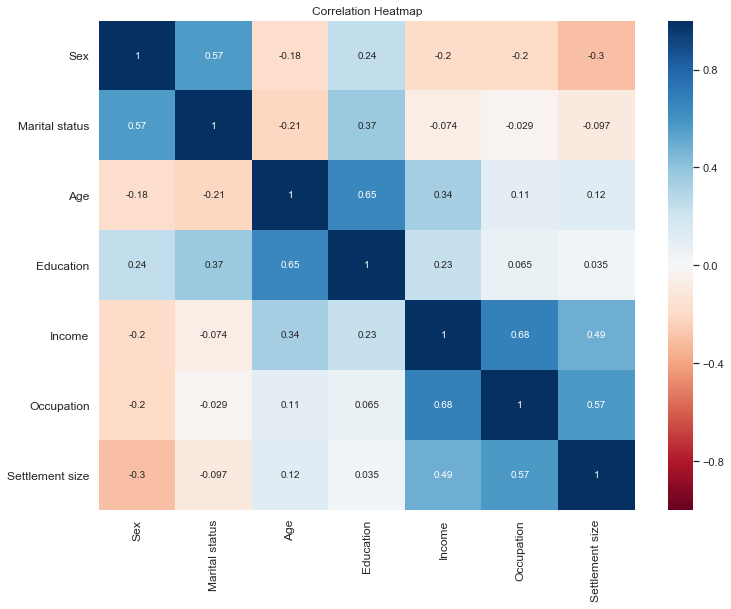

In [6]:
plt.figure(figsize = (12 , 9))
s = sns.heatmap(df_seg.corr(),
               annot = True,
               cmap = 'RdBu',
               vmin = -1,
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')

# Visualize Data

Text(0.5, 1.0, 'Visualization of Raw Data')

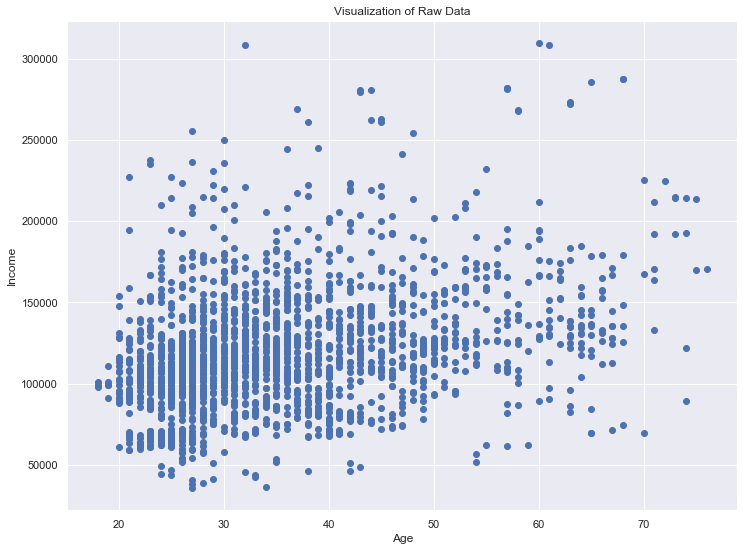

In [7]:
plt.figure(figsize = (12, 9))
plt.scatter(df_seg.iloc[:, 2], df_seg.iloc[:,4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization of Raw Data')

 # Standardization

In [8]:
scaler = StandardScaler()
seg_std = scaler.fit_transform(df_seg)

# Hierarchical Clustering

In [9]:
hi_clust = linkage(seg_std, method = 'ward')

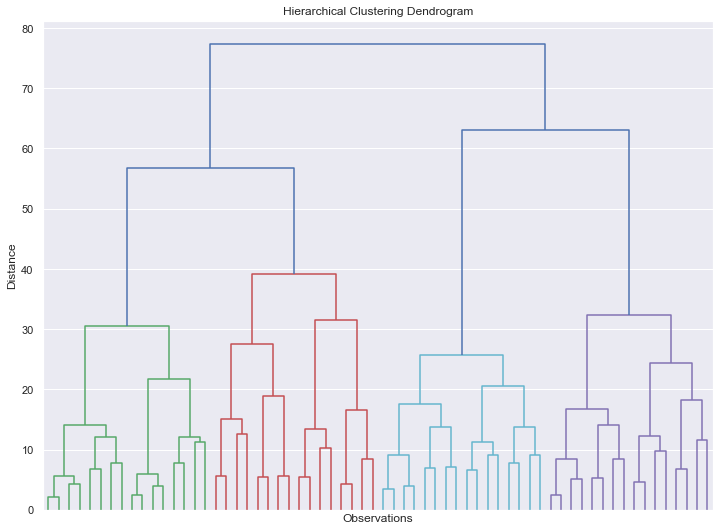

In [10]:
plt.figure(figsize = (12, 9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hi_clust,
           truncate_mode = 'level',
           p = 5,
          show_leaf_counts = False,
          no_labels = True)

plt.show()

# K-Means Clustering

In [11]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(seg_std)
    wcss.append(kmeans.inertia_)

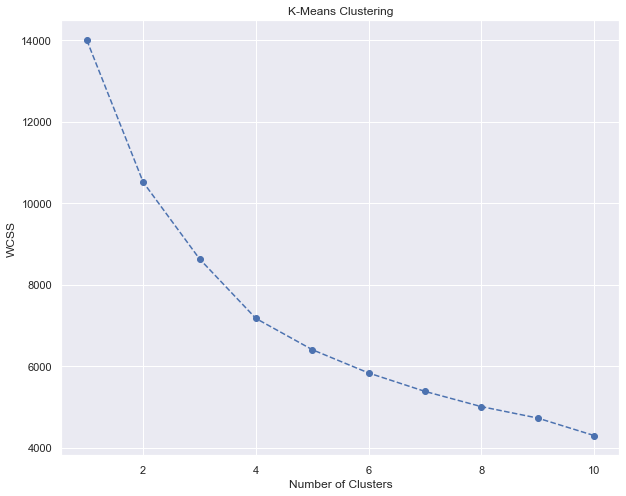

In [12]:
plt.figure(figsize = (10, 8))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-Means Clustering')
plt.show()

In [13]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [14]:
kmeans.fit(seg_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

# Results

In [15]:
df_seg_kmeans = df_seg.copy()
df_seg_kmeans['Segment K-Means'] = kmeans.labels_

In [16]:
df_seg_analysis = df_seg_kmeans.groupby(['Segment K-Means']).mean()
df_seg_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-Means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807


In [17]:
df_seg_analysis['N_Obs'] = df_seg_kmeans[['Segment K-Means', 'Sex']].groupby (['Segment K-Means']).count()

In [18]:
df_seg_analysis['Prop_Obs'] = df_seg_analysis['N_Obs'] / df_seg_analysis['N_Obs'].sum()

In [19]:
df_seg_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N_Obs,Prop_Obs
Segment K-Means,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


In [20]:
df_seg_analysis.rename({0 : 'well-off',
                        1 : 'fewer_opportunities',
                        2 : 'standard',
                        3 : 'career-focused'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N_Obs,Prop_Obs
Segment K-Means,,,,,,,,,
well-off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
fewer_opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
career-focused,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


In [21]:
df_seg_kmeans['Labels'] = df_seg_kmeans['Segment K-Means'].map({0 : 'well-off',
                                                                1 : 'fewer_opportunities',
                                                                2 : 'standard',
                                                                3 : 'career-focused'})

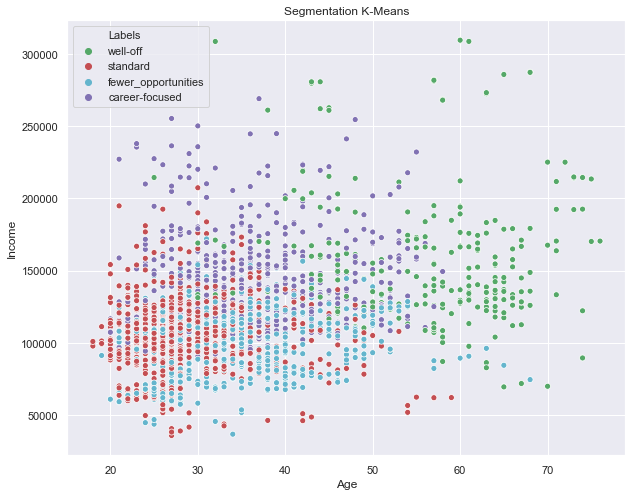

In [22]:
x_axis = df_seg_kmeans['Age']
y_axis = df_seg_kmeans['Income']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_seg_kmeans['Labels'], palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation K-Means')
plt.show()

# PCA

In [23]:
pca = PCA()

In [24]:
pca.fit(seg_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [25]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

Text(0, 0.5, 'Cumulative Explained Variance')

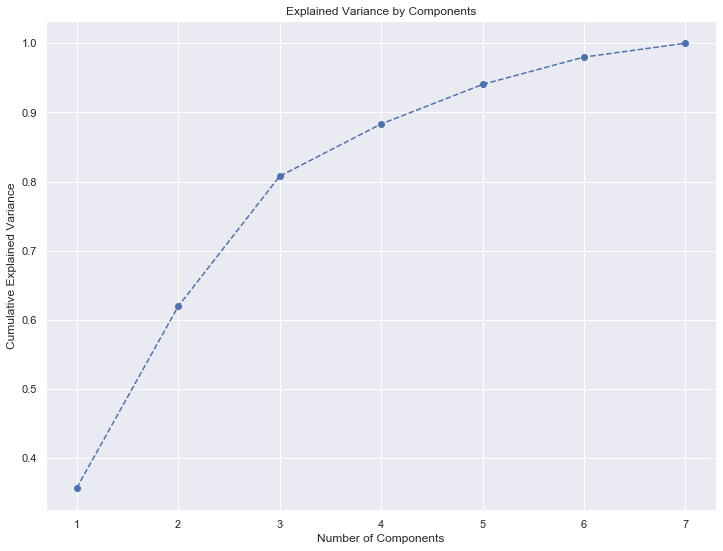

In [26]:
plt.figure(figsize = (12, 9))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [27]:
pca = PCA(n_components = 3)

In [28]:
pca.fit(seg_std)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

# PCA with 4 components

In [29]:
pca_4 = PCA(n_components = 4)

In [30]:
pca_4.fit(seg_std)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

# PCA results

In [31]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [32]:
pca_4.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503],
       [-0.31560091,  0.28045392, -0.00950602,  0.18147643, -0.48260023,
        -0.28169039,  0.69026455]])

In [33]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                          columns = df_seg.columns.values,
                          index = ['Component 1', 'Component 2', 'COmponent 3'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
COmponent 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


In [34]:
df_pca4_comp = pd.DataFrame(data = pca_4.components_,
                           columns = df_seg. columns.values,
                           index = ['Component 1', 'Component 2', 'COmponent 3', 'Component 4'])
df_pca4_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
COmponent 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685
Component 4,-0.315601,0.280454,-0.009506,0.181476,-0.482600,-0.281690,0.690265


([<matplotlib.axis.YTick at 0x7fa62fdd21d0>,
 <a list of 3 Text yticklabel objects>)

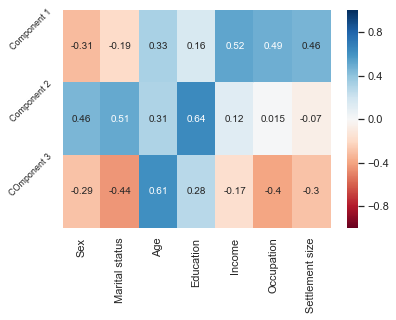

In [35]:
sns.heatmap(df_pca_comp,
           vmin = -1,
           vmax = 1,
           cmap = 'RdBu',
           annot = True)
plt.yticks([0, 1, 2], 
          ['Component 1', 'Component 2', 'COmponent 3'],
          rotation = 45,
          fontsize = 9)

([<matplotlib.axis.YTick at 0x7fa630465110>,
 <a list of 4 Text yticklabel objects>)

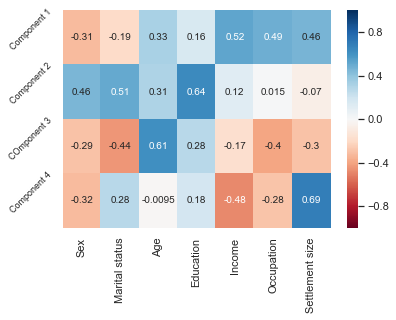

In [36]:
sns.heatmap(df_pca4_comp,
           vmin = -1,
           vmax = 1,
           cmap = 'RdBu',
           annot = True)
plt.yticks([0, 1, 2, 3], 
          ['Component 1', 'Component 2', 'COmponent 3', 'Component 4'],
          rotation = 45,
          fontsize = 9)

In [37]:
pca.transform(seg_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [38]:
pca_4.transform(seg_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ,  1.21779432],
       [ 0.34493528,  0.59814564, -2.21160279,  0.54838542],
       [-0.65106267, -0.68009318,  2.2804186 ,  0.12067518],
       ...,
       [-1.45229829, -2.23593665,  0.89657125, -0.13177412],
       [-2.24145254,  0.62710847, -0.53045631, -0.04260559],
       [-1.86688505, -2.45467234,  0.66262172,  0.10089556]])

In [39]:
scores_pca = pca.transform(seg_std)

In [40]:
scores_pca_4 = pca_4.transform(seg_std)

# K-Means with PCA

In [41]:
wcss = []
for i in range(1, 11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

In [42]:
wcss_4 = []
for i in range(1, 11):
    kmeans_pca4 = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca4.fit(scores_pca_4)
    wcss_4.append(kmeans_pca4.inertia_)

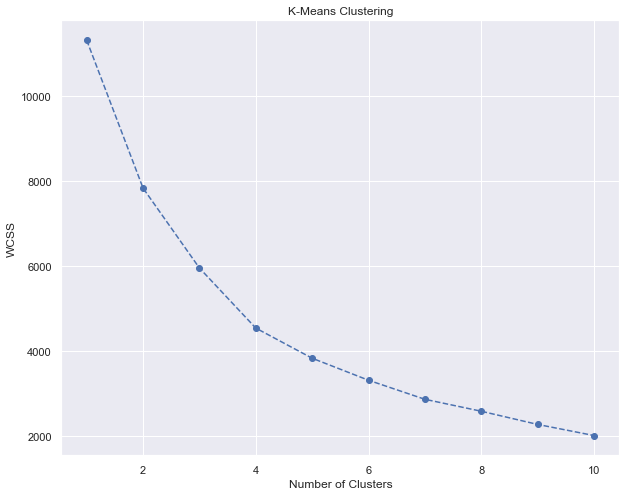

In [43]:
plt.figure(figsize = (10, 8))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-Means Clustering')
plt.show()

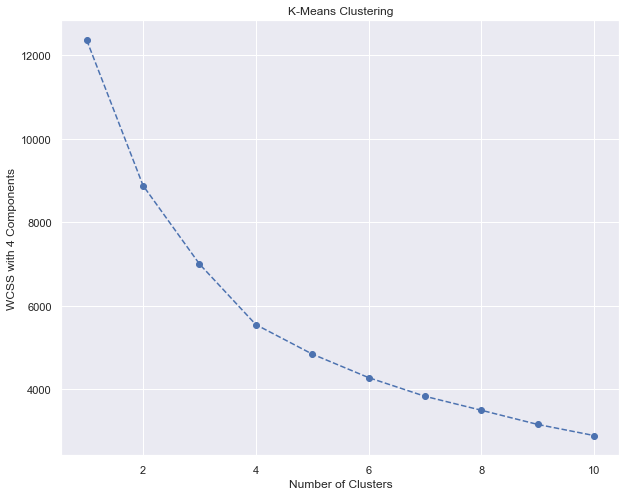

In [44]:
plt.figure(figsize = (10, 8))
plt.plot(range(1,11), wcss_4, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS with 4 Components')
plt.title('K-Means Clustering')
plt.show()

# Kmeans with 4 clusters and 3 components

In [45]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [46]:
kmeans_pca.fit(scores_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

# Kmeans with 4 clusters and 3 components Results

In [47]:
df_seg_pca_kmeans = pd.concat([df_seg.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_seg_pca_kmeans.columns.values[-3 : ] = ['Component 1', 'Component 2', 'COmponent 3']
df_seg_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [48]:
df_seg_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,COmponent 3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,2
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,0
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,2
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,0


In [49]:
df_seg_pca_kmeans_freq = df_seg_pca_kmeans.groupby (['Segment K-means PCA']).mean()
df_seg_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,COmponent 3
Segment K-means PCA,,,,,,,,,,
0,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410
1,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046
2,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644
3,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039


# Kmeans with 4 clusters and 4 components

In [50]:
kmeans_pca_4 = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [51]:
kmeans_pca_4.fit(scores_pca_4)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

# Kmeans with 4 clusters and 4 components Results

In [52]:
df_seg_pca_4_kmeans = pd.concat([df_seg.reset_index(drop = True), pd.DataFrame(scores_pca_4)], axis = 1)
df_seg_pca_4_kmeans.columns.values[-4 : ] = ['Component 1', 'Component 2', 'COmponent 3', 'Component 4']
df_seg_pca_4_kmeans['Segment K-means PCA'] = kmeans_pca_4.labels_

In [53]:
df_seg_pca_4_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,COmponent 3,Component 4,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,1.217794,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0.548385,0
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,0.120675,1
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,-0.510753,2
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,-0.231808,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,-0.945916,1
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,-0.736766,0
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,-0.131774,1
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,-0.042606,0


In [54]:
df_seg_pca_4_kmeans_freq = df_seg_pca_4_kmeans.groupby (['Segment K-means PCA']).mean()
df_seg_pca_4_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,COmponent 3,Component 4
Segment K-means PCA,,,,,,,,,,,
0,0.905045,0.986647,28.873887,1.063798,107576.228487,0.672107,0.439169,-1.122432,0.733291,-0.797918,-0.019662
1,0.319018,0.089980,35.259714,0.768916,95850.155419,0.296524,0.038855,-0.987777,-0.882022,0.965476,-0.271684
2,0.026178,0.178010,35.624782,0.734729,140950.319372,1.267016,1.520070,1.381089,-1.044848,-0.273292,0.211736
3,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,1.697646,2.029427,0.841953,0.093869


# Observing the proportions of Clusters with 3 and 4 Components

     3 Components

In [55]:
df_seg_pca_kmeans_freq.columns.values

array(['Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size', 'Component 1', 'Component 2',
       'COmponent 3'], dtype=object)

In [56]:
df_seg_pca_kmeans_freq['N_Obs'] = df_seg_pca_kmeans[['Segment K-means PCA', 'Sex']].groupby (['Segment K-means PCA']).count()
df_seg_pca_kmeans_freq['Prop_Obs'] = df_seg_pca_kmeans_freq['N_Obs'] / df_seg_pca_kmeans_freq['N_Obs'].sum()
df_seg_pca_kmeans_freq = df_seg_pca_kmeans_freq.rename({0 : 'well-off',
                                                        1 : 'fewer_opportunities',
                                                        2 : 'standard',
                                                        3 : 'career-focused'})
df_seg_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,COmponent 3,N_Obs,Prop_Obs
Segment K-means PCA,,,,,,,,,,,,
well-off,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692,0.3460
fewer_opportunities,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915
standard,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460,0.2300
career-focused,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265,0.1325


    4 Components

In [57]:
df_seg_pca_4_kmeans_freq['N_Obs'] = df_seg_pca_4_kmeans[['Segment K-means PCA', 'Sex']].groupby (['Segment K-means PCA']).count()
df_seg_pca_4_kmeans_freq['Prop_Obs'] = df_seg_pca_4_kmeans_freq['N_Obs'] / df_seg_pca_kmeans_freq['N_Obs'].sum()
df_seg_pca_4_kmeans_freq = df_seg_pca_4_kmeans_freq.rename({0 : 'well-off',
                                                        1 : 'fewer_opportunities',
                                                        2 : 'standard',
                                                        3 : 'career-focused'})
df_seg_pca_4_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,COmponent 3,Component 4,N_Obs,Prop_Obs
Segment K-means PCA,,,,,,,,,,,,,
well-off,0.905045,0.986647,28.873887,1.063798,107576.228487,0.672107,0.439169,-1.122432,0.733291,-0.797918,-0.019662,674,0.3370
fewer_opportunities,0.319018,0.089980,35.259714,0.768916,95850.155419,0.296524,0.038855,-0.987777,-0.882022,0.965476,-0.271684,489,0.2445
standard,0.026178,0.178010,35.624782,0.734729,140950.319372,1.267016,1.520070,1.381089,-1.044848,-0.273292,0.211736,573,0.2865
career-focused,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,1.697646,2.029427,0.841953,0.093869,264,0.1320


# Visualizing the Results

     3 Components

In [58]:
df_seg_pca_kmeans['Legend'] = df_seg_pca_kmeans['Segment K-means PCA'].map({0 : 'well-off',
                                                        1 : 'fewer_opportunities',
                                                        2 : 'standard',
                                                        3 : 'career-focused'})

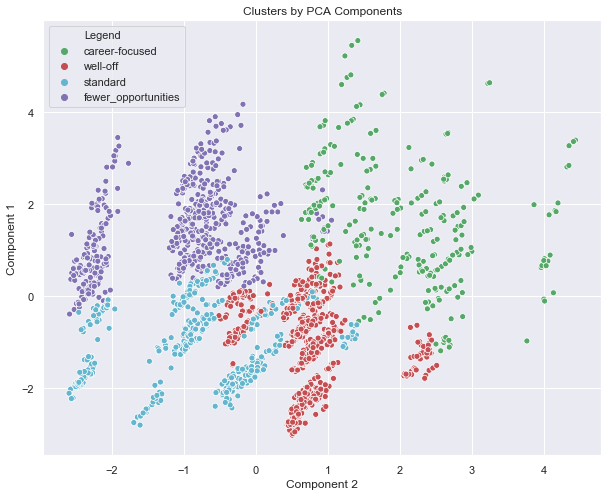

In [59]:
x_axis = df_seg_pca_kmeans['Component 2']
y_axis = df_seg_pca_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_seg_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

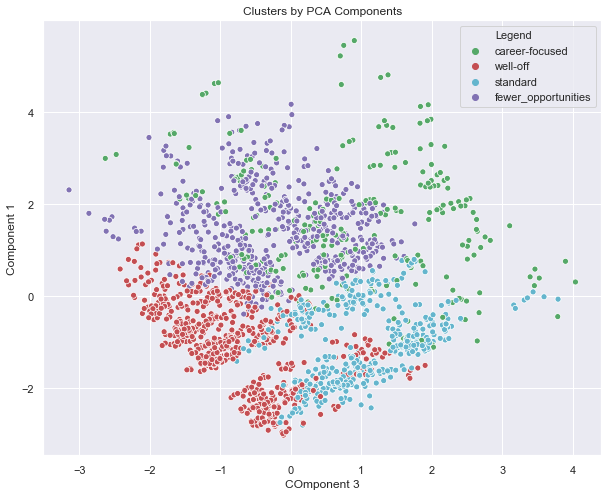

In [60]:
x_axis_1 = df_seg_pca_kmeans['COmponent 3']
y_axis_1 = df_seg_pca_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis_1, y_axis_1, hue = df_seg_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

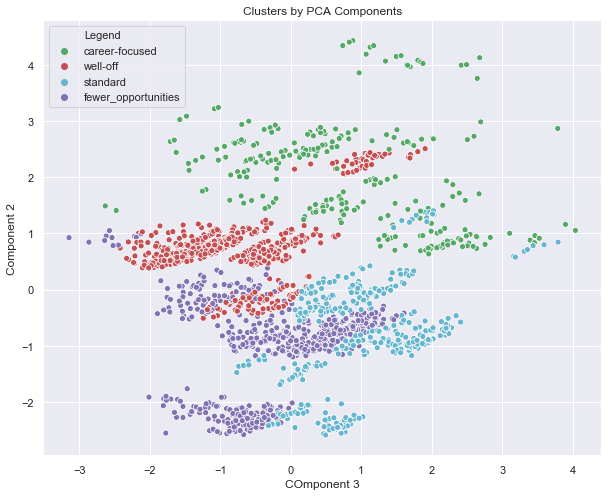

In [61]:
x_axis_1 = df_seg_pca_kmeans['COmponent 3']
y_axis_1 = df_seg_pca_kmeans['Component 2']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis_1, y_axis_1, hue = df_seg_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

    4 Components

In [62]:
df_seg_pca_4_kmeans['Legend'] = df_seg_pca_4_kmeans['Segment K-means PCA'].map({0 : 'well-off',
                                                        1 : 'fewer_opportunities',
                                                        2 : 'standard',
                                                        3 : 'career-focused'})

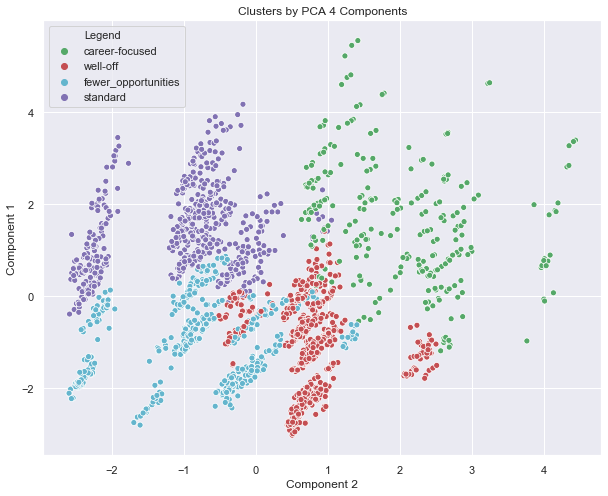

In [63]:
x_axis = df_seg_pca_4_kmeans['Component 2']
y_axis = df_seg_pca_4_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_seg_pca_4_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA 4 Components')
plt.show()

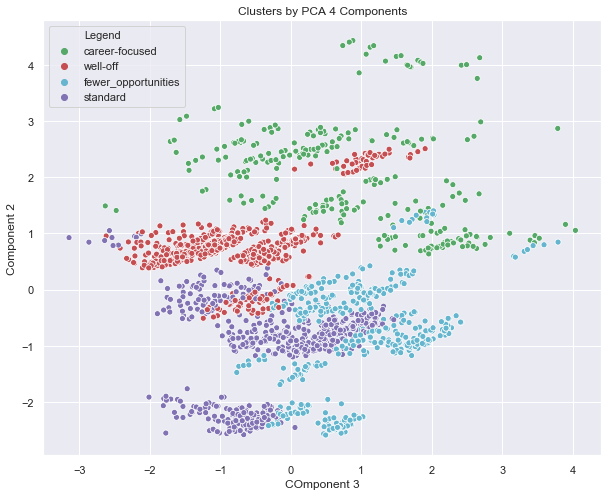

In [64]:
x_axis = df_seg_pca_4_kmeans['COmponent 3']
y_axis = df_seg_pca_4_kmeans['Component 2']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_seg_pca_4_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA 4 Components')
plt.show()

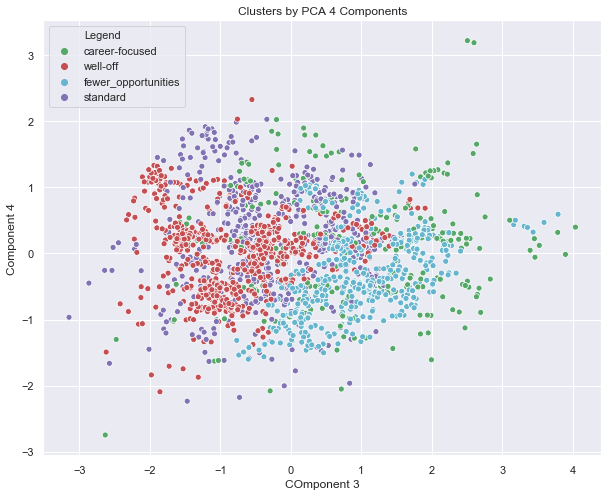

In [65]:
x_axis = df_seg_pca_4_kmeans['COmponent 3']
y_axis = df_seg_pca_4_kmeans['Component 4']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_seg_pca_4_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA 4 Components')
plt.show()

# Data Export

In [66]:
pickle.dump(scaler, open('scaler.pickle', 'wb'))

In [67]:
pickle.dump(pca, open('pca.pickle', 'wb'))

In [68]:
pickle.dump(kmeans_pca, open('kmeans_pca.pickle', 'wb'))